# Lecture 6 Workbook
## Power
This is a workbook that contains the python code that was used in slides
appearing in the lecture. It is provided so that you can see for yourself
how this code works.

## Definitions and setup
Code here is just for making everything look sort of *uniform*

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from scipy.stats import gamma, norm, t, randint, chi2, poisson
from scipy.stats import ttest_ind
import pandas as pd
from IPython.display import HTML


In [36]:
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10

This is the seed for the random number generator. Graphs for the course will be generated with seed 367 (for BME). You can change it or use 'shuffle' to get different pseudo-random numbers each time.

In [37]:
np.random.seed(367)

## Load data
Load data on cerebellar volumes

In [38]:
cblm_data = pd.read_csv('cerebellar_volumes.csv')


## Two sample CI

### Generate a sample of young and old people

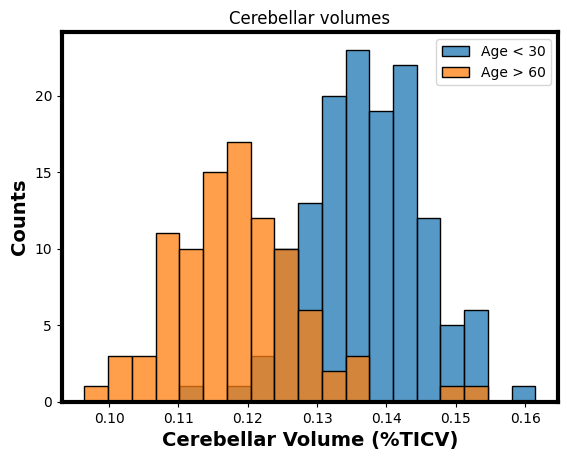

In [40]:
col_name = 'TCV_Corr'
# Define age limits and age text function
young_lims = [0, 30]
old_lims = [60, 120]

def lim_text(a,b):
    return f'Age {a}-{b}' if a>0 and b<120 else 'All ages' if a==0 and b==120 else f'Age > {a}' if b==120 else f'Age < {b}'

# Extract ages from dataframe
ages = cblm_data['Age']
young_index = np.where((young_lims[0] < ages) & (ages < young_lims[1]))[0]
old_index = np.where((old_lims[0] < ages) & (ages < old_lims[1]))[0]

# Extract cerebellar volume data
young_cbl_vol = cblm_data.loc[young_index, col_name]
old_cbl_vol = cblm_data.loc[old_index, col_name]

# Compute histogram and plot
cbl_vol_min = cblm_data[col_name].min()
cbl_vol_max = cblm_data[col_name].max()
cbl_vol_plot_x = np.linspace(cbl_vol_min, cbl_vol_max, 100)
cbl_vol_bin_x = np.linspace(cbl_vol_min, cbl_vol_max, 20)

sns.histplot(young_cbl_vol, bins=cbl_vol_bin_x, label=lim_text(*young_lims))
sns.histplot(old_cbl_vol, bins=cbl_vol_bin_x, label=lim_text(*old_lims))
plt.xlabel('Cerebellar Volume (%TICV)')
plt.ylabel('Counts')
plt.title('Cerebellar volumes')
plt.legend()
plt.show()



### Apply two sample t test


Text(0.2, 0.2, '$N_{1} = 95$\n$N_{2} = 136$\n$df = 229$\n$t = 1.97$\n$ci = [-0.021 -0.016]$')

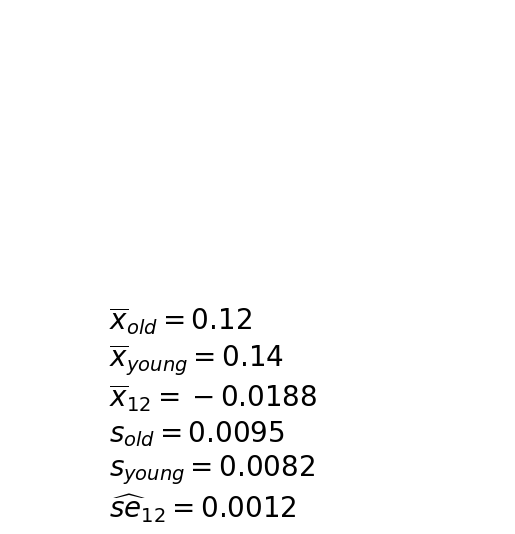

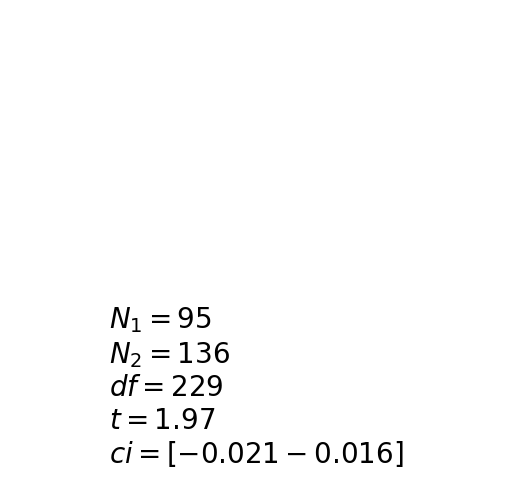

In [41]:
# Compute mean and variance of old and young cerebellar volume samples
mean1 = old_cbl_vol.mean()
mean2 = young_cbl_vol.mean()
mean12 = mean1 - mean2
v1 = old_cbl_vol.var()
v2 = young_cbl_vol.var()
N1 = len(old_cbl_vol)
N2 = len(young_cbl_vol)
se12 = np.sqrt(v1/N1 + v2/N2)

# Compute degrees of freedom and critical t-value
df = N1 + N2 - 2
t975 = t.ppf(0.975, df)

# Compute confidence interval
ci = mean12 + se12*t975*np.array([-1, 1])

# Plot results
fig, ax = plt.subplots()
ax.axis('off')
ax.annotate(f"$\overline{{x}}_{{old}} = {mean1:.2f}$\n"
            f"$\overline{{x}}_{{young}} = {mean2:.2f}$\n"
            f"$\overline{{x}}_{{12}} = {mean12:.4f}$\n"
            f"$s_{{old}} = {np.sqrt(v1):.4f}$\n"
            f"$s_{{young}} = {np.sqrt(v2):.4f}$\n"
            f"$\widehat{{se}}_{{12}} = {se12:.4f}$", 
            xy=(0.2, 0.2), xycoords='axes fraction', fontsize=20, weight='bold', 
            ha='left', va='top', 
            bbox=dict(boxstyle='square', fc='white', ec='none', alpha=0.9))

fig, ax = plt.subplots()
ax.axis('off')
ax.annotate(f"$N_{{1}} = {N1}$\n"
            f"$N_{{2}} = {N2}$\n"
            f"$df = {df}$\n"
            f"$t = {t975:.2f}$\n"
            f"$ci = [{ci[0]:.3f} {ci[1]:.3f}]$", 
            xy=(0.2, 0.2), xycoords='axes fraction', fontsize=20, weight='bold', 
            ha='left', va='top', 
            bbox=dict(boxstyle='square', fc='white', ec='none', alpha=0.9))


### Plot the confidence interval

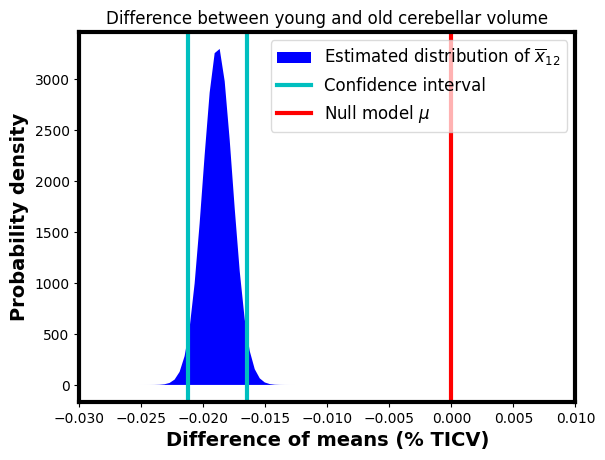

In [42]:
ciDistribution = t(df, loc=mean12, scale=se12)
x = np.linspace(-0.03, 0.01, 100)

fig, ax = plt.subplots()

aCI = ax.fill_between(x, ciDistribution.pdf(x)*10, facecolor='b')
yl = ax.get_ylim()
lCI = ax.axvline(ci[0], ymin=0, ymax=1, color='c')
ax.axvline(ci[1], ymin=0, ymax=1, color='c')
lNull = ax.axvline(0, ymin=0, ymax=1, color='r')

ax.set_xlim([min(x), max(x)])
ax.set_xlabel('Difference of means (% TICV)')
ax.set_ylabel('Probability density')
ax.set_title('Difference between young and old cerebellar volume')
ax.legend([aCI, lCI, lNull], ['Estimated distribution of $\overline{x}_{12}$', 'Confidence interval', 'Null model $\mu$'], \
    loc='best', fancybox=True, framealpha=0.7, fontsize=12)
plt.show()


## Two sample t test

### Get the $p$ value

Text(0.2, 0.5, '$p = 1.539e-38$')

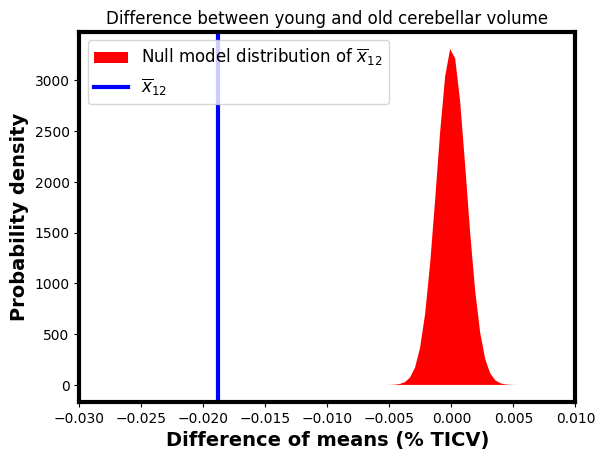

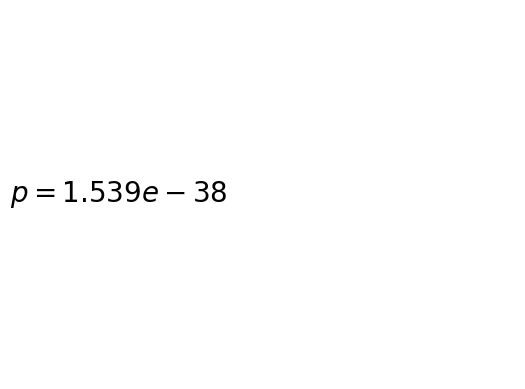

In [43]:
p = t.cdf(mean12/se12, df)

nullDistribution = t(df, loc=0, scale=se12)
x = np.linspace(-0.03, 0.01, 100)

fig1, ax1 = plt.subplots()
ax1.fill_between(x, nullDistribution.pdf(x)*10, facecolor='r', label='Null model distribution of $\overline{x}_{12}$')
ax1.get_ylim()
lmean = ax1.axvline(x=mean12, ymin=yl[0], ymax=yl[1], color='b', label='$\overline{x}_{12}$')

ax1.set_xlim([min(x), max(x)])
ax1.set_xlabel('Difference of means (% TICV)')
ax1.set_ylabel('Probability density')
ax1.set_title('Difference between young and old cerebellar volume')
ax1.legend(loc='upper left', fontsize=12)

fig2, ax2 = plt.subplots()
ax2.axis('off')
ax2.text(0.2, 0.5, f'$p = {p:.4}$', transform=ax2.transAxes, fontsize=20, fontweight='bold', ha='center', va='center')


## Power of the test

### Calculate the power

Percent significant: 1.0


Text(0.5, 1.0, 'N = 10; alpha = 0.01')

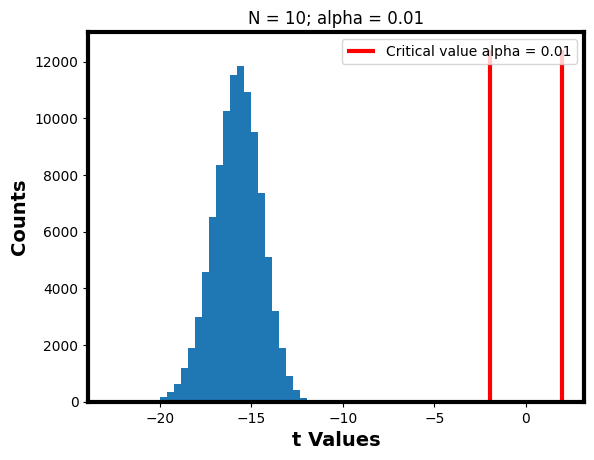

In [44]:
sigma1 = np.sqrt(v1)
sigma2 = np.sqrt(v2)
mu1 = mean1
mu2 = mean2
alpha = 0.05

numReps = 100000
sample1 = np.random.normal(mu1, sigma1, (N1, numReps))
sample2 = np.random.normal(mu2, sigma2, (N2, numReps))

sampleMean1 = np.mean(sample1, axis=0)
sampleMean2 = np.mean(sample2, axis=0)
sampleVar1 = np.var(sample1, ddof=1, axis=0)
sampleVar2 = np.var(sample2, ddof=1, axis=0)
SEM = np.sqrt(sampleVar1/N1 + sampleVar2/N2)

T = (sampleMean1 - sampleMean2) / SEM
TCrit = t.ppf(1 - (alpha/2), N1+N2-2)
TSig = np.abs(T) > TCrit
percentSig = np.sum(TSig) / numReps
print('Percent significant:', percentSig)

fig, ax = plt.subplots()
ax.hist(T, bins=30)
yl = ax.get_ylim()
ax.vlines([TCrit, -TCrit], [yl[0], yl[0]], [yl[1], yl[1]], colors='r', label='Critical value alpha = 0.01')
ax.set_xlabel('t Values')
ax.set_ylabel('Counts')
ax.legend()
ax.set_title('N = 10; alpha = 0.01')



### Power as a function of effect size

In [45]:
combinedSigma = np.sqrt( (v1*(N1-1)+v2*(N2-1)) / (N1+N2-2) )

numReps = 10000

allEffectSizes = np.linspace(0, 1, 100)
numEffectSizes = len(allEffectSizes)
percentSig = np.zeros(len(allEffectSizes))
for effectSizeNum in range(numEffectSizes):
    effectSize = allEffectSizes[effectSizeNum]

    mu1 = mean12 - effectSize*combinedSigma/2
    mu2 = mean12 + effectSize*combinedSigma/2
    sample1 = np.random.normal(mu1, combinedSigma, (N1, numReps))
    sample2 = np.random.normal(mu2, combinedSigma, (N2, numReps))

    sampleMean1 = np.mean(sample1, axis=0)
    sampleMean2 = np.mean(sample2, axis=0)
    sampleVar1 = np.var(sample1, ddof=1, axis=0)
    sampleVar2 = np.var(sample2, ddof=1, axis=0)
    VarComb = sampleVar1 + sampleVar2
    SEM = np.sqrt(sampleVar1/N1 + sampleVar2/N2)

    T = (sampleMean1 - sampleMean2)/SEM
    TCrit = t.ppf(1 - (alpha/2), N1+N2-2)
    TSig = np.abs(T) > TCrit
    percentSig[effectSizeNum] = np.sum(TSig) / numReps




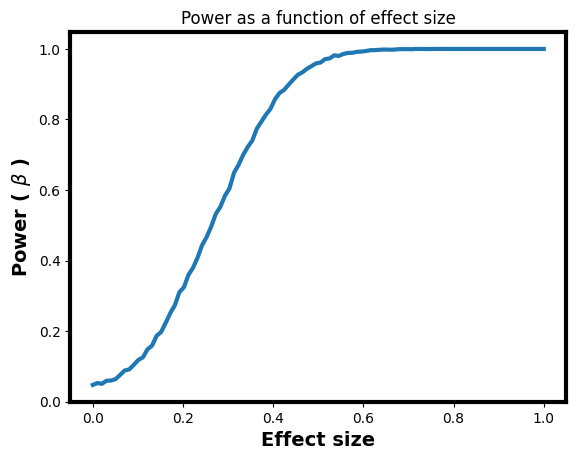

In [46]:
def effect_size_plot():
  fig, ax = plt.subplots()
  ax.plot(allEffectSizes, percentSig)
  yl = ax.get_ylim()
  xl = ax.get_xlim()
  ax.set_title('Power as a function of effect size')
  ax.set_xlabel('Effect size')
  ax.set_ylabel('Power ( $\\beta$ )')
  return ax

ax = effect_size_plot()

#### Calculate the effect size with the desired power

Text(0.35, 0.3, 'min effect size = 0.44')

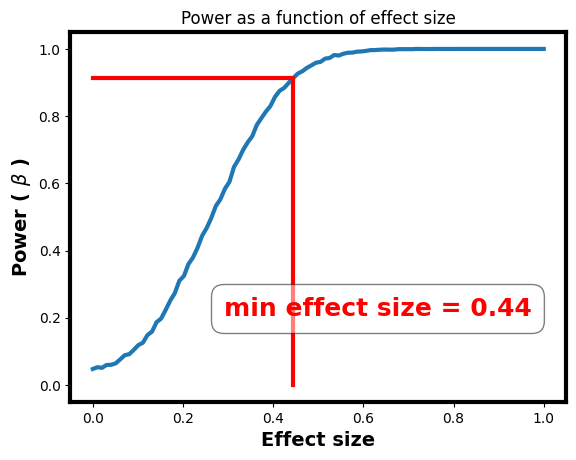

In [47]:
ax = effect_size_plot()

desiredPower = 0.9
minIndex = np.argmax(percentSig > desiredPower)
minEffectSize = allEffectSizes[minIndex]
minPower = percentSig[minIndex]

ax.plot([minEffectSize, minEffectSize, 0], [0, minPower, minPower], 'r')
ax.annotate(f'min effect size = {minEffectSize:.2f}', xy=(minEffectSize, minPower),
            xytext=(0.35, 0.3), textcoords='figure fraction',
            fontsize=18, fontweight='bold', color='r', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))


## Pre and post hoc power

### Pre hoc power

Calculate this for a medium sized effect

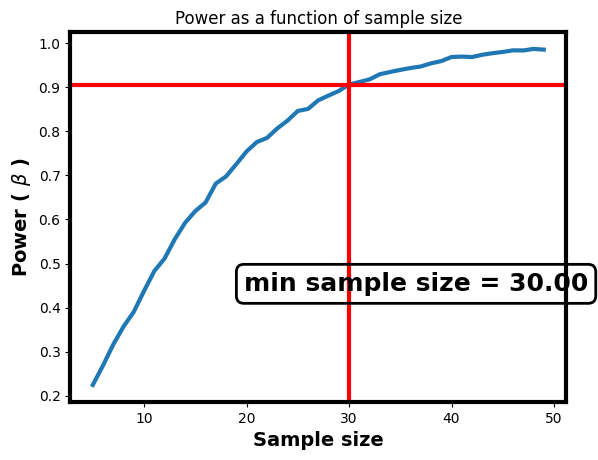

In [53]:
sigma1 = np.sqrt(v1)
sigma2 = np.sqrt(v2)
mu1 = mean1
mu2 = mean1 + 0.8*sigma1

allN = np.arange(5, 50)
numN = len(allN)
percentSig = np.zeros(numN)

for NNum in range(numN):
    N = allN[NNum]
    sample1 = np.random.normal(mu1, sigma1, (N, numReps))
    sample2 = np.random.normal(mu2, sigma2, (N, numReps))
    
    sampleMean1 = np.mean(sample1, axis=0)
    sampleMean2 = np.mean(sample2, axis=0)
    sampleVar1 = np.var(sample1, ddof=1, axis=0)
    sampleVar2 = np.var(sample2, ddof=1, axis=0)
    VarComb = sampleVar1 + sampleVar2
    SEM = np.sqrt(sampleVar1/N + sampleVar2/N)
    
    T = (sampleMean1 - sampleMean2) / SEM
    TCrit = t.ppf(1 - (alpha/2), 2*N-2)
    TSig = np.abs(T) > TCrit
    percentSig[NNum] = np.sum(TSig) / numReps

fig, ax = plt.subplots()
ax.plot(allN, percentSig)
yl = ax.get_ylim()
xl = ax.get_xlim()
ax.set_title('Power as a function of sample size')
ax.set_xlabel('Sample size')
ax.set_ylabel(r'Power ( $\it\beta$ )')

minIndex = np.argmax(percentSig >= 0.9)
minN = allN[minIndex]
minPower = percentSig[minIndex]

ax.axvline(minN, color='r')
ax.axhline(minPower, color='r')
ax.text(0.35, 0.3, f'min sample size = {minN:.2f}', transform=ax.transAxes, 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=2),
        fontweight='bold', fontsize=18)
plt.show()


## Why is power important?

### How sample size effects estimated effect size

Text(0, 0.5, 'Effect size')

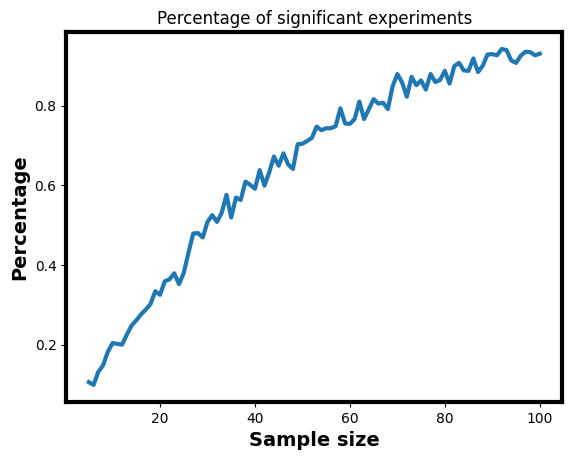

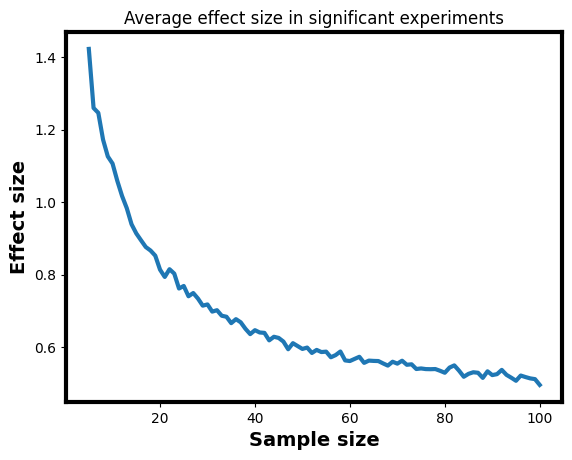

In [55]:
# Set up parameters
true_effect_size = 0.5
pop_size = 50000  # Population size
num_reps = 1000  # Number of experiments to run
alpha = 0.05  # Significance level

# Set up sample sizes to test
all_n = range(5, 101)

# Initialize arrays to store results
percent_sig = np.zeros_like(all_n, dtype=float)
avg_effect_size_sig = np.zeros_like(all_n, dtype=float)

# Simulate experiments
for i, n in enumerate(all_n):
    # Generate population data
    pop_data1 = np.random.normal(loc=0, scale=1, size=int(pop_size / 2))
    pop_data2 = np.random.normal(loc=true_effect_size, scale=1, size=int(pop_size / 2))

    # Run experiments
    sig_count = 0
    sig_effect_size_sum = 0
    for j in range(num_reps):
        # Generate samples
        sample1 = np.random.choice(pop_data1, size=n)
        sample2 = np.random.choice(pop_data2, size=n)

        # Calculate effect size and p-value
        effect_size = np.mean(sample2) - np.mean(sample1)
        _, p = ttest_ind(sample1, sample2, equal_var=True)

        # Determine if p-value is significant
        if p < alpha:
            sig_count += 1
            sig_effect_size_sum += effect_size

    # Calculate and store results
    percent_sig[i] = sig_count / num_reps
    if sig_count > 0:
        avg_effect_size_sig[i] = sig_effect_size_sum / sig_count

plt.figure()
plt.plot(all_n, percent_sig)
plt.title('Percentage of significant experiments')
plt.xlabel('Sample size')
plt.ylabel('Percentage')

plt.figure()
plt.plot(all_n, avg_effect_size_sig)
plt.title('Average effect size in significant experiments')
plt.xlabel('Sample size')
plt.ylabel('Effect size')

## One tailed tests

### Point null models and regions of equivalence

#### Point null model

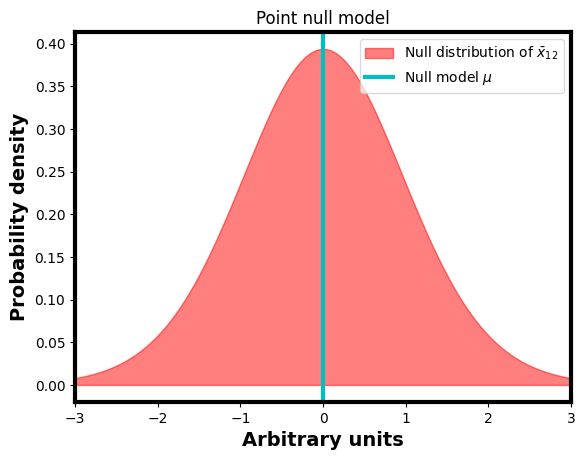

In [58]:
mu0 = 0
se0 = 1
df = 20

ar = mu0 + t.ppf([0.025, 0.975], df)*se0

arDistribution = t(df, mu0, se0)

x = np.linspace(-3, 3, 100)

fig, ax = plt.subplots()

ax.fill_between(x, arDistribution.pdf(x), color='r', alpha=0.5, label='Null distribution of $\\bar{x}_{12}$')
ax.axvline(x=mu0, color='c', label='Null model $\\mu$')

ax.set_xlim([min(x), max(x)])

ax.set_xlabel('Arbitrary units')
ax.set_ylabel('Probability density')
ax.set_title('Point null model')

plt.legend(loc='best', fancybox=True, framealpha=0.7)

plt.show()


#### Region of equivalence

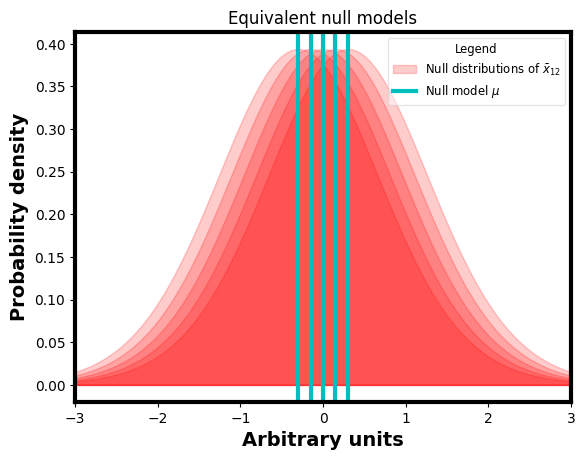

In [63]:
allMu0 = np.linspace(-0.3, 0.3, 5)
se0 = 1
df = 20

fig, ax = plt.subplots()

for mu0Num in range(len(allMu0)):
    mu0 = allMu0[mu0Num]

    ar = mu0 + t.ppf([0.025, 0.975], df)*se0

    arDistribution = t(df, mu0, se0)
    x = np.linspace(-3, 3, 100)

    aAR = ax.fill_between(x, arDistribution.pdf(x), color='r', alpha=0.2)
    lNull = ax.axvline(x=mu0, color='c')

ax.set_xlim([min(x), max(x)])
ax.set_xlabel('Arbitrary units')
ax.set_ylabel('Probability density')
ax.set_title('Equivalent null models')
ax.legend([aAR, lNull], [
        'Null distributions of $\\bar{x}_{12}$', 
        'Null model $\\mu$'
    ], loc='best', fancybox=True, framealpha=0.5, fontsize='small',
    title_fontsize='small', title='Legend')


### One side equivalence region

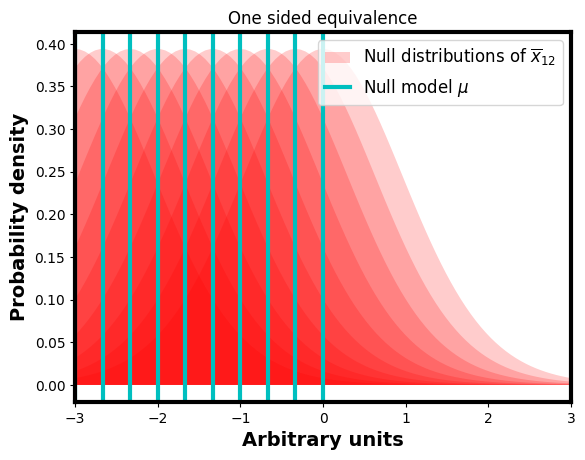

In [69]:
allMu0 = np.linspace(-3, 0, 10)
se0 = 1
df = 20

fig, ax = plt.subplots()
for mu0Num in range(len(allMu0)):
    mu0 = allMu0[mu0Num]

    ar = mu0 + t.ppf([0.025, 0.975], df)*se0

    arDistribution = t(df, mu0, se0)
    x = np.linspace(-3, 3, 100)

    aAR = ax.fill_between(x, arDistribution.pdf(x), alpha=0.2, facecolor='r')

for mu0Num in range(len(allMu0)):
    mu0 = allMu0[mu0Num]

    lNull = ax.axvline(x=mu0, color='c')

ax.set_xlim([np.min(x), np.max(x)])
ax.set_xlabel('Arbitrary units')
ax.set_ylabel('Probability density')
ax.set_title('One sided equivalence')
ax.legend([aAR, lNull], ['Null distributions of $\overline{x}_{12}$', 'Null model $\mu$'], loc='upper right', fontsize=12, handlelength=1.5)
plt.show()


### Acceptance regions for equivalent null models

#### Point null model

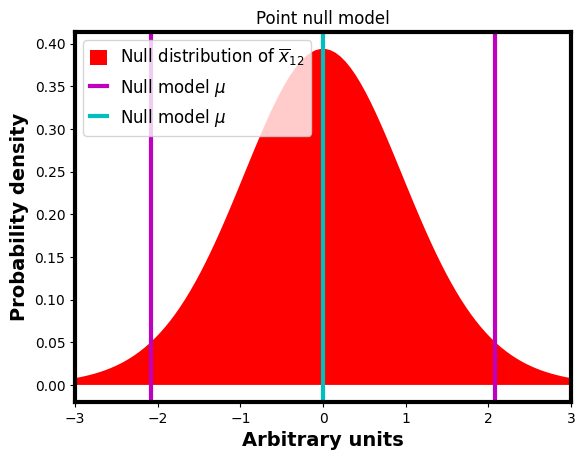

In [70]:
mu0 = 0
se0 = 1
df = 20

ar = mu0 + t.ppf([0.025, 0.975], df)*se0

arDistribution = t(df, loc=mu0, scale=se0)
x = np.linspace(-3, 3, 100)

fig, ax = plt.subplots()

ax.fill_between(x, arDistribution.pdf(x), facecolor='r', label='Null distribution of $\overline{x}_{12}$')
ax.axvline(x=ar[0], color='m', label='Null model $\mu$')
ax.axvline(x=ar[1], color='m')
ax.axvline(x=mu0, color='c', label='Null model $\mu$')

ax.set_xlim([min(x), max(x)])
ax.set_xlabel('Arbitrary units')
ax.set_ylabel('Probability density')
ax.set_title('Point null model')
ax.legend(loc='upper left',
    fontsize=12,
    handlelength=1,
    handleheight=1)


#### One sided null model

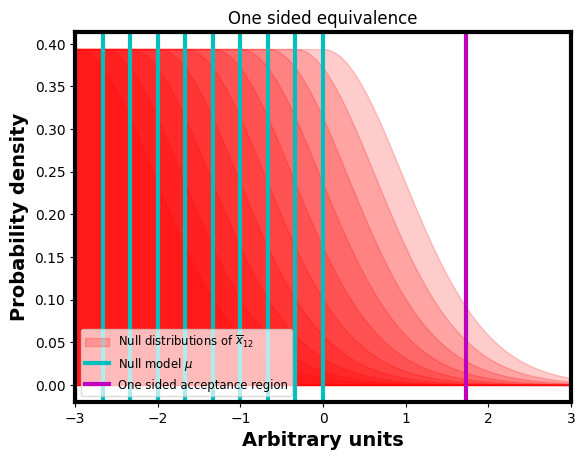

In [71]:
allMu0 = np.linspace(-3, 0, 10)
se0 = 1
df = 20

fig, ax = plt.subplots()

for mu0 in allMu0:
    arDistribution = t(df, mu0, se0)
    x = np.linspace(-3, 3, 100)
    
    posX = x[x >= mu0]
    arOneSided = (x < mu0) * arDistribution.pdf(posX[0]) + (x >= mu0) * arDistribution.pdf(x)
    aAR = ax.fill_between(x, arOneSided, alpha=0.2, color='r')
    
for mu0 in allMu0:
    lNull = ax.axvline(x=mu0, color='c')

ar = mu0 + t.ppf(0.95, df) * se0
lAR = ax.axvline(x=ar, color='m')

ax.set_xlim([min(x), max(x)])
ax.set_xlabel('Arbitrary units')
ax.set_ylabel('Probability density')
ax.set_title('One sided equivalence')
ax.legend([aAR, lNull, lAR], 
          ['Null distributions of $\overline{x}_{12}$', 'Null model $\mu$', 'One sided acceptance region'], 
          loc='lower left', fontsize='small', fancybox=True, framealpha=0.7)

plt.show()
